# Python Tactics : Datetime Module

## A module that supplies classes for manipulating date and time

## The datetime module allows for the creation and manipulation of 4 types of objects
    (1) Time object - local time of day, independent of the particular day
    (2) Date object - date in an idealized calendar (Gregorian)
    (3) Datetime object - a single object containing both date and time
    (4) Timedelta Object - a duration or difference between two dates ot times

In [91]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('~/Box/MPO624_data/bahamas_cloud.csv')

/opt/miniconda3/envs/MPO624/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## (1) Creating datetime variables

In [72]:
df #viewing the dataframe

,station,lat,lon,year,month,hour,day,ws,wd,n,slp,at,h,nh,cl,cm,ch
0,78073,25.000000,-77.400000,1971,1,9,1,21.0,210.0,0.0,10122.0,210.0,-1.0,0,0.0,0,0.0
1,78073,25.000000,-77.400000,1971,1,12,1,72.0,320.0,8.0,10142.0,210.0,6.0,4,5.0,3,-1.0
2,78073,25.000000,-77.400000,1971,1,15,1,72.0,330.0,7.0,10165.0,220.0,5.0,1,5.0,3,4.0
3,78073,25.000000,-77.400000,1971,1,18,1,41.0,330.0,7.0,10147.0,220.0,9.0,2,0.0,3,7.0
4,78073,25.000000,-77.400000,1971,1,0,2,62.0,350.0,6.0,10156.0,190.0,9.0,0,0.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99134,78073,25.038958,77.466231,2021,2,3,25,NaN,NaN,NaN,10220.0,244.0,NaN,NaN,NaN,NaN,NaN
99135,78073,25.038958,77.466231,2021,1,12,1,31.0,110.0,8.0,10230.0,239.0,NaN,8.0,8.0,NaN,NaN
99136,78073,25.038958,77.466231,2021,1,0,15,31.0,40.0,8.0,10151.0,228.0,NaN,8.0,8.0,NaN,NaN
99137,78073,25.038958,77.466231,2021,1,12,18,5.0,990.0,6.0,10199.0,169.0,NaN,6.0,0.0,5.0,NaN


### (1) (a) Making subset of dataframe

In [92]:
df.head() #viewing first 5 rows

,station,lat,lon,year,month,hour,day,ws,wd,n,slp,at,h,nh,cl,cm,ch
0,78073,25.0,-77.4,1971,1,9,1,21.0,210.0,0.0,10122.0,210.0,-1.0,0,0.0,0,0.0
1,78073,25.0,-77.4,1971,1,12,1,72.0,320.0,8.0,10142.0,210.0,6.0,4,5.0,3,-1.0
2,78073,25.0,-77.4,1971,1,15,1,72.0,330.0,7.0,10165.0,220.0,5.0,1,5.0,3,4.0
3,78073,25.0,-77.4,1971,1,18,1,41.0,330.0,7.0,10147.0,220.0,9.0,2,0.0,3,7.0
4,78073,25.0,-77.4,1971,1,0,2,62.0,350.0,6.0,10156.0,190.0,9.0,0,0.0,0,5.0


In [93]:
df.head(3) #viewing the first N rows

,station,lat,lon,year,month,hour,day,ws,wd,n,slp,at,h,nh,cl,cm,ch
0,78073,25.0,-77.4,1971,1,9,1,21.0,210.0,0.0,10122.0,210.0,-1.0,0,0.0,0,0.0
1,78073,25.0,-77.4,1971,1,12,1,72.0,320.0,8.0,10142.0,210.0,6.0,4,5.0,3,-1.0
2,78073,25.0,-77.4,1971,1,15,1,72.0,330.0,7.0,10165.0,220.0,5.0,1,5.0,3,4.0


In [94]:
subset = df.head(100) #using pandas.dataframe.head() to make a subset of the first N rows

In [95]:
subset

,station,lat,lon,year,month,hour,day,ws,wd,n,slp,at,h,nh,cl,cm,ch
0,78073,25.0,-77.4,1971,1,9,1,21.0,210.0,0.0,10122.0,210.0,-1.0,0,0.0,0,0.0
1,78073,25.0,-77.4,1971,1,12,1,72.0,320.0,8.0,10142.0,210.0,6.0,4,5.0,3,-1.0
2,78073,25.0,-77.4,1971,1,15,1,72.0,330.0,7.0,10165.0,220.0,5.0,1,5.0,3,4.0
3,78073,25.0,-77.4,1971,1,18,1,41.0,330.0,7.0,10147.0,220.0,9.0,2,0.0,3,7.0
4,78073,25.0,-77.4,1971,1,0,2,62.0,350.0,6.0,10156.0,190.0,9.0,0,0.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,78073,25.0,-77.4,1971,1,12,16,72.0,0.0,6.0,10181.0,220.0,5.0,6,2.0,0,0.0
96,78073,25.0,-77.4,1971,1,15,16,72.0,0.0,7.0,10204.0,210.0,5.0,7,8.0,-1,-1.0
97,78073,25.0,-77.4,1971,1,18,16,72.0,20.0,1.0,10186.0,230.0,6.0,1,8.0,0,0.0
98,78073,25.0,-77.4,1971,1,0,17,72.0,10.0,3.0,10189.0,190.0,6.0,3,5.0,0,0.0


In [96]:
df1 = subset[["year","month","day","hour"]] #extracting date and time variables and naming columns appropriately

In [97]:
dt = pd.to_datetime(df1) #creating column of datetime variables
dt

0    1971-01-01 09:00:00
1    1971-01-01 12:00:00
2    1971-01-01 15:00:00
3    1971-01-01 18:00:00
4    1971-01-02 00:00:00
             ...        
95   1971-01-16 12:00:00
96   1971-01-16 15:00:00
97   1971-01-16 18:00:00
98   1971-01-17 00:00:00
99   1971-01-17 06:00:00
Length: 100, dtype: datetime64[ns]

In [98]:
subset["dates"] = dt

/var/folders/0s/y7jwzcpd30g7fmswyypr08s80000gn/T/ipykernel_40554/3884060147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["dates"] = dt


In [99]:
subset

,station,lat,lon,year,month,hour,day,ws,wd,n,slp,at,h,nh,cl,cm,ch,dates
0,78073,25.0,-77.4,1971,1,9,1,21.0,210.0,0.0,10122.0,210.0,-1.0,0,0.0,0,0.0,1971-01-01 09:00:00
1,78073,25.0,-77.4,1971,1,12,1,72.0,320.0,8.0,10142.0,210.0,6.0,4,5.0,3,-1.0,1971-01-01 12:00:00
2,78073,25.0,-77.4,1971,1,15,1,72.0,330.0,7.0,10165.0,220.0,5.0,1,5.0,3,4.0,1971-01-01 15:00:00
3,78073,25.0,-77.4,1971,1,18,1,41.0,330.0,7.0,10147.0,220.0,9.0,2,0.0,3,7.0,1971-01-01 18:00:00
4,78073,25.0,-77.4,1971,1,0,2,62.0,350.0,6.0,10156.0,190.0,9.0,0,0.0,0,5.0,1971-01-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,78073,25.0,-77.4,1971,1,12,16,72.0,0.0,6.0,10181.0,220.0,5.0,6,2.0,0,0.0,1971-01-16 12:00:00
96,78073,25.0,-77.4,1971,1,15,16,72.0,0.0,7.0,10204.0,210.0,5.0,7,8.0,-1,-1.0,1971-01-16 15:00:00
97,78073,25.0,-77.4,1971,1,18,16,72.0,20.0,1.0,10186.0,230.0,6.0,1,8.0,0,0.0,1971-01-16 18:00:00
98,78073,25.0,-77.4,1971,1,0,17,72.0,10.0,3.0,10189.0,190.0,6.0,3,5.0,0,0.0,1971-01-17 00:00:00


In [105]:
#assessing individual elements in datetime variable, e.g. year

subset["dates"][5]

Timestamp('1971-01-02 03:00:00')

## (2) Timedelta

In [106]:
#making time delta object by subtracting two datetime objects

date1 = subset["dates"][0]
date2 = subset["dates"][30]

date_diff = date2-date1
date_diff

Timedelta('4 days 15:00:00')

In [107]:
#making time delat object using timedelta function

diff_hours = datetime.timedelta(hours = 3)
diff_hours

datetime.timedelta(seconds=10800)

## Algebraic Operations with Datetime and Timedelta

In [108]:
#Incrementing datetime object

date4 = date1 + datetime.timedelta(hours =3)
print(date1+diff_hours,date4)

1971-01-01 12:00:00 1971-01-01 12:00:00


In [109]:
#arithmetic with timedelta objects
delta1 = datetime.timedelta(hours = 4)
delta2 = datetime.timedelta(hours = 3, seconds=6)

print(delta1+delta2,delta1-delta2,4*delta2)

7:00:06 0:59:54 12:00:24


In [111]:
#looping through with datetime
for i in range(len(subset)):
    if subset["dates"][i].hour == 12:
        print(subset["dates"][i],subset["ws"][i])

1971-01-01 12:00:00 72.0
1971-01-02 12:00:00 0.0
1971-01-03 12:00:00 36.0
1971-01-04 12:00:00 51.0
1971-01-06 12:00:00 10.0
1971-01-07 12:00:00 10.0
1971-01-08 12:00:00 0.0
1971-01-12 12:00:00 0.0
1971-01-13 12:00:00 0.0
1971-01-14 12:00:00 0.0
1971-01-15 12:00:00 0.0
1971-01-16 12:00:00 72.0


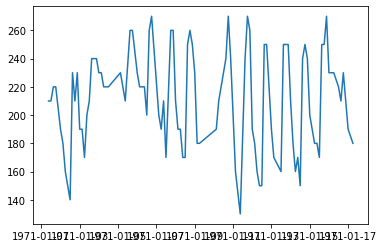

In [89]:
#plotting a graph using datetime

plt.plot(subset["dates"], subset["at"])

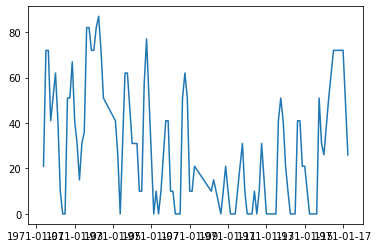

In [90]:
plt.plot(subset["dates"], subset["ws"])